In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sgd_vanilla import NeuralNetwork

rng = np.random.default_rng()

with open("../data/train_data.pkl", "rb") as train_file:
    train_data = pickle.load(train_file)

rng.shuffle(train_data)
validation_data = train_data[:5000]
train_data = train_data[5000:]

### Upper bound

At $learning~rate = 1e^{-2}$, gradients go to nan

In [6]:
# get upper bound

nn = NeuralNetwork(
    [28*28, 1024, 512, 256, 128, 64, 10], # layers size
    1e-3,                           # learning rate
    64,                            # mini batch size
    2                               # training epochs
)

nn.train(train_data, validation_data)

Pre-train stats
==> Accuracy: 6.5%, Avg loss: 2.538705

Epoch 0
--------------------
loss: 2.584022 [mini-batch 0 / 859]
loss: 0.863439 [mini-batch 100 / 859]
loss: 0.631710 [mini-batch 200 / 859]
loss: 0.785530 [mini-batch 300 / 859]
loss: 0.714624 [mini-batch 400 / 859]
loss: 0.496941 [mini-batch 500 / 859]
loss: 0.616181 [mini-batch 600 / 859]
loss: 0.445545 [mini-batch 700 / 859]
loss: 0.606924 [mini-batch 800 / 859]
==> Accuracy: 81.6%, Avg loss: 0.528947

Epoch 1
--------------------
loss: 0.537935 [mini-batch 0 / 859]
loss: 0.521437 [mini-batch 100 / 859]
loss: 0.519006 [mini-batch 200 / 859]
loss: 0.484267 [mini-batch 300 / 859]
loss: 0.474799 [mini-batch 400 / 859]
loss: 0.370711 [mini-batch 500 / 859]
loss: 0.381911 [mini-batch 600 / 859]
loss: 0.492784 [mini-batch 700 / 859]
loss: 0.457213 [mini-batch 800 / 859]
==> Accuracy: 82.7%, Avg loss: 0.497764



([0.0652, 0.8158, 0.8268],
 [2.53870462536722, 0.5289466260515856, 0.49776406215165825])

In [7]:
etas = [1e-6, 1e-5, 1e-4, 1e-3]
n_trials = 5

results = {eta:[] for eta in etas}
for eta in etas:
    for _ in range(n_trials):
        nn = NeuralNetwork(
            [28*28, 512, 128, 64, 10], # layers size
            eta,                      # learning rate
            64,                        # mini batch size
            5 # training epochs
        )
        accuracy, _ = nn.train(train_data, validation_data)
        results[eta].append( accuracy[-1] )    

Pre-train stats
==> Accuracy: 8.5%, Avg loss: 5.482983

Epoch 0
--------------------
loss: 5.080401 [mini-batch 0 / 859]
loss: 4.803390 [mini-batch 100 / 859]
loss: 4.253553 [mini-batch 200 / 859]
loss: 4.118259 [mini-batch 300 / 859]
loss: 3.572328 [mini-batch 400 / 859]
loss: 3.856593 [mini-batch 500 / 859]
loss: 3.666855 [mini-batch 600 / 859]
loss: 3.464669 [mini-batch 700 / 859]
loss: 3.280781 [mini-batch 800 / 859]
==> Accuracy: 11.4%, Avg loss: 3.389511

Epoch 1
--------------------
loss: 3.471739 [mini-batch 0 / 859]
loss: 3.301901 [mini-batch 100 / 859]
loss: 3.218524 [mini-batch 200 / 859]
loss: 3.006152 [mini-batch 300 / 859]
loss: 3.236323 [mini-batch 400 / 859]
loss: 3.306492 [mini-batch 500 / 859]
loss: 2.767461 [mini-batch 600 / 859]
loss: 3.105749 [mini-batch 700 / 859]
loss: 3.063544 [mini-batch 800 / 859]
==> Accuracy: 18.8%, Avg loss: 2.830173

Epoch 2
--------------------
loss: 2.912947 [mini-batch 0 / 859]
loss: 2.818730 [mini-batch 100 / 859]
loss: 2.946768 [mini-

In [17]:
x = []
y = []

for eta, values in results.items():
    for value in values:
        x.append( eta )
        y.append( 100 * value )

Text(0.5, 1.0, 'Accuracy sensitivity to Learning rate parameter')

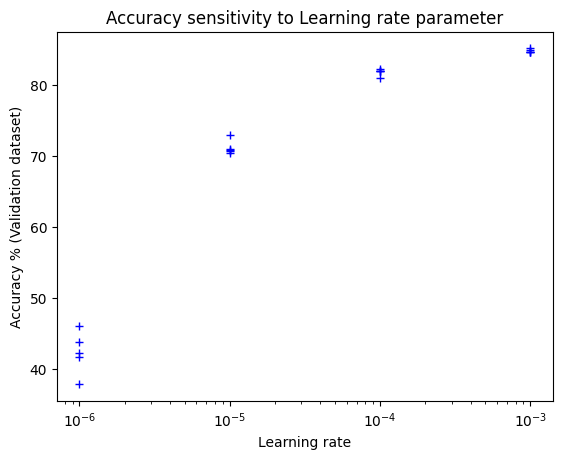

In [21]:
plt.plot(x, y, "b+")
plt.xscale("log")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy % (Validation dataset)")
plt.title("Accuracy sensitivity to Learning rate parameter")